# Test Data Trend Analysis

## Installation of Needed Libraries

In [1]:
!pip install pandasql
!pip install plotly==5.14.1

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import pandas as pd
from pandasql import sqldf
import plotly.express as px
from sklearn.cluster import KMeans

## Patient Information Dataframes

### Data Processing

In [2]:
#Patient Identifier	Age at Diagnosis	Sex	Patient's Vital Status	Overall Survival Status	Overall Survival (Months)	OS Months (Additonal Data)	Patient Tumor Grade
#Identifier to uniquely specify a patient.	Age at Diagnosis	Sex	The survival state of the person.	Overall patient survival status.	Overall survival in months since initial diagonosis.	OS Months (Additonal Data)	Patient Tumor Grade
#STRING	NUMBER	STRING	STRING	STRING	NUMBER	NUMBER	STRING
#1	1	1	1	9	1	1	1

clinicalPatientDF = pd.read_csv("../Test-Data/data_clinical_patient.txt",delimiter="\t", header = 4)

In [3]:
clinicalPatientDF

,PATIENT_ID,AGE_AT_DIAGNOSIS,SEX,VITAL_STATUS,OS_STATUS,OS_MONTHS,OS_MONTHS_ADDITIONAL,PATIENT_GRADE
0,P-0000119,67,Female,Deceased,1:DECEASED,27.37,NaN,Mod_Diff
1,P-0000241,49,Female,Deceased,1:DECEASED,24.00,NaN,Mod-Poorly-Diff
2,P-0000493,24,Male,Deceased,1:DECEASED,23.87,NaN,NaN
3,P-0000511,39,Female,Deceased,1:DECEASED,23.27,NaN,Poorly-Diff
4,P-0000520,64,Male,Living,0:LIVING,41.50,NaN,Mod-Poorly-Diff
...,...,...,...,...,...,...,...,...
1094,P-0014252,59,Male,Living,0:LIVING,55.37,NaN,Mod_Diff
1095,P-0014258,69,Male,Deceased,1:DECEASED,9.97,NaN,Mod-Poorly-Diff
1096,P-0014296,46,Female,Living,0:LIVING,12.07,NaN,NaN
1097,P-0014404,62,Female,Living,0:LIVING,NaN,28.23,Poorly-Diff


In [4]:
#Patient Identifier	Sample Identifier	Chemo Exposure of sequenced specimen	Tumor Sample Histology	MSI Status	Oncotree Code	Sample Type	Primary Tumor Site	Metastatic Biopsy Site	Primary Tumor Location	Gene Panel	Stage At Diagnosis	Molecular Subtype	MSI Score	mCRC Type	Specimen Type	Metastasectomy	Metastasectomy Site	TIme to Metastasis Months	Time from Met Dx to Sequencing	First Site of Metastasis	Metastases Site First: Liver	Metastases Site First: Ln	Metastases Site First: Lung	Metastases Site First: Pelvis	Metastases Site First: Brain	Metastases Site First: Bone	Metastases Site First: Peritoneum, omentum, abdomen	Metastases Site First: Gynecological	Other Metastasis Sites	Cancer Type	Cancer Type Detailed	Somatic Status	TMB (nonsynonymous)
#Identifier to uniquely specify a patient.	A unique sample identifier.	Chemo Exposure of sequenced specimen	Tumor Sample Histology	MSI status.	Oncotree Code	The type of sample (i.e., normal, primary, met, recurrence).	Text term to describe the organ sub-division in an individual with cancer.	Metastatic Biopsy Site	Primary Tumor Location	Gene panel.	Stage At Diagnosis	Molecular subtype.	MSI Score	mCRC Type	The broad cancer phenotype and site information values for a sample to be processed.	Metastasectomy	Metastasectomy Site	TIme to Metastasis Months	Time from Met Dx to Sequencing	First Site of Metastasis	Metastases Site First: Liver	Metastases Site First: Ln	Metastases Site First: Lung	Metastases Site First: Pelvis	Metastases Site First: Brain	Metastases Site First: Bone	Metastases Site First: Peritoneum, omentum, abdomen	Metastases Site First: Gynecological	Other Metastasis Sites Description	Cancer Type	Cancer Type Detailed	Somatic Status	TMB (nonsynonymous)
#STRING	STRING	STRING	STRING	STRING	STRING	STRING	STRING	STRING	STRING	STRING	STRING	STRING	NUMBER	STRING	STRING	STRING	STRING	NUMBER	NUMBER	STRING	STRING	STRING	STRING	STRING	STRING	STRING	STRING	STRING	STRING	STRING	STRING	STRING	NUMBER
#1	1	1	1	1	1	9	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1

clinicalSampleDF = pd.read_csv("../Test-Data/data_clinical_sample.txt",delimiter="\t", header = 4)

In [5]:
clinicalSampleDF

,PATIENT_ID,SAMPLE_ID,CHEMO_EXP_SEQ_SPECIMEN,TUMOR_SAMPLE_HISTOLOGY,MSI_STATUS,ONCOTREE_CODE,SAMPLE_TYPE,PRIMARY_SITE,METASTATIC_BIOPSY_SITE,PRIMARY_TUMOR_LOCATION,...,METASTASES_SITE_FIRST_PELVIS,METASTASES_SITE_FIRST_BRAIN,METASTASES_SITE_FIRST_BONE,METASTASES_SITE_FIRST_PERITONEUM_OMENTUM_ABDOMEN,METASTASES_SITE_FIRST_GYN,OTHER_SITES_OF_METS,CANCER_TYPE,CANCER_TYPE_DETAILED,SOMATIC_STATUS,TMB_NONSYNONYMOUS
0,P-0000119,P-0000119-T01-IM3,Yes,Conventional,NaN,COADREAD,Metastasis,Cecum,Ovary,Right,...,0,0,0,1,0,0,Colorectal Cancer,Colorectal Adenocarcinoma,Matched,9.982398
1,P-0000241,P-0000241-T01-IM3,Yes,Conventional,MSS,COADREAD,Metastasis,Ascending Colon,Peritoneum,Right,...,0,0,0,0,0,0,Colorectal Cancer,Colorectal Adenocarcinoma,Matched,8.873242
2,P-0000493,P-0000493-T01-IM3,Yes,NaN,NaN,COADREAD,Metastasis,Sigmoid Colon,Liver,Left,...,0,0,0,0,0,1,Colorectal Cancer,Colorectal Adenocarcinoma,Matched,4.436621
3,P-0000511,P-0000511-T01-IM3,Yes,PDC,MSS,COADREAD,Metastasis,Sigmoid Colon,Chest Wall,Left,...,0,0,0,1,1,0,Colorectal Cancer,Colorectal Adenocarcinoma,Matched,4.436621
4,P-0000520,P-0000520-T01-IM3,No,Conventional,MSS,COADREAD,Primary,Cecum,NaN,Right,...,0,0,0,1,0,0,Colorectal Cancer,Colorectal Adenocarcinoma,Matched,5.545777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,P-0014252,P-0014252-T01-IM6,Yes,Conventional,MSS,COADREAD,Metastasis,Cecum,Liver,Right,...,0,0,0,0,0,0,Colorectal Cancer,Colorectal Adenocarcinoma,Matched,3.458792
1130,P-0014258,P-0014258-T01-IM6,No,Conventional,NaN,COADREAD,Primary,Sigmoid Colon,NaN,Left,...,0,0,0,0,0,0,Colorectal Cancer,Colorectal Adenocarcinoma,Matched,77.822829
1131,P-0014296,P-0014296-T01-IM6,No,NaN,MSS,COADREAD,Metastasis,Sigmoid Colon,Skull base,Left,...,0,1,0,0,0,0,Colorectal Cancer,Colorectal Adenocarcinoma,Matched,8.646981
1132,P-0014404,P-0014404-T01-IM6,No,Signet_Ring_Cell,MSI,COADREAD,Primary,Rectosigmoid,NaN,Left,...,0,0,0,0,0,0,Colorectal Cancer,Colorectal Adenocarcinoma,Matched,19.888056


In [6]:
resultUnchanged = pd.merge(clinicalPatientDF, clinicalSampleDF, how="outer", on=["PATIENT_ID", "PATIENT_ID"])

In [60]:
#Patient Identifier	Sample Identifier	Chemo Exposure of sequenced specimen	Tumor Sample Histology	MSI Status	Oncotree Code	Sample Type	Primary Tumor Site	Metastatic Biopsy Site	Primary Tumor Location	Gene Panel	Stage At Diagnosis	Molecular Subtype	MSI Score	mCRC Type	Specimen Type	Metastasectomy	Metastasectomy Site	TIme to Metastasis Months	Time from Met Dx to Sequencing	First Site of Metastasis	Metastases Site First: Liver	Metastases Site First: Ln	Metastases Site First: Lung	Metastases Site First: Pelvis	Metastases Site First: Brain	Metastases Site First: Bone	Metastases Site First: Peritoneum, omentum, abdomen	Metastases Site First: Gynecological	Other Metastasis Sites	Cancer Type	Cancer Type Detailed	Somatic Status	TMB (nonsynonymous)
#Identifier to uniquely specify a patient.	A unique sample identifier.	Chemo Exposure of sequenced specimen	Tumor Sample Histology	MSI status.	Oncotree Code	The type of sample (i.e., normal, primary, met, recurrence).	Text term to describe the organ sub-division in an individual with cancer.	Metastatic Biopsy Site	Primary Tumor Location	Gene panel.	Stage At Diagnosis	Molecular subtype.	MSI Score	mCRC Type	The broad cancer phenotype and site information values for a sample to be processed.	Metastasectomy	Metastasectomy Site	TIme to Metastasis Months	Time from Met Dx to Sequencing	First Site of Metastasis	Metastases Site First: Liver	Metastases Site First: Ln	Metastases Site First: Lung	Metastases Site First: Pelvis	Metastases Site First: Brain	Metastases Site First: Bone	Metastases Site First: Peritoneum, omentum, abdomen	Metastases Site First: Gynecological	Other Metastasis Sites Description	Cancer Type	Cancer Type Detailed	Somatic Status	TMB (nonsynonymous)
#STRING	STRING	STRING	STRING	STRING	STRING	STRING	STRING	STRING	STRING	STRING	STRING	STRING	NUMBER	STRING	STRING	STRING	STRING	NUMBER	NUMBER	STRING	STRING	STRING	STRING	STRING	STRING	STRING	STRING	STRING	STRING	STRING	STRING	STRING	NUMBER
#1	1	1	1	1	1	9	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1

dataCnaDF = pd.read_csv("../Test-Data/data_cna.txt",delimiter="\t")

In [61]:
dataCnaDF.to_excel(r'dataCnaDF.xlsx', index=False)
dataCnaDF.to_csv(r'dataCnaDF.csv', index=False)

In [37]:
dataCnaDF

,Hugo_Symbol,P-0006287-T01-IM5,P-0004652-T01-IM5,P-0002852-T01-IM3,P-0009139-T01-IM5,P-0006822-T01-IM5,P-0000682-T01-IM3,P-0011110-T01-IM5,P-0010207-T01-IM5,P-0003886-T01-IM5,...,P-0008226-T02-IM5,P-0004736-T01-IM5,P-0010425-T01-IM5,P-0012389-T01-IM5,P-0009842-T01-IM5,P-0010966-T01-IM5,P-0009433-T01-IM5,P-0006763-T01-IM5,P-0000635-T01-IM3,P-0001525-T01-IM3
0,RB1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,MDC1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,ARAF,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,PREX2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,SOX17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,ERCC2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
470,HIST3H3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
471,ERCC5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
472,KRAS,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [38]:
#Patient Identifier	Sample Identifier	Chemo Exposure of sequenced specimen	Tumor Sample Histology	MSI Status	Oncotree Code	Sample Type	Primary Tumor Site	Metastatic Biopsy Site	Primary Tumor Location	Gene Panel	Stage At Diagnosis	Molecular Subtype	MSI Score	mCRC Type	Specimen Type	Metastasectomy	Metastasectomy Site	TIme to Metastasis Months	Time from Met Dx to Sequencing	First Site of Metastasis	Metastases Site First: Liver	Metastases Site First: Ln	Metastases Site First: Lung	Metastases Site First: Pelvis	Metastases Site First: Brain	Metastases Site First: Bone	Metastases Site First: Peritoneum, omentum, abdomen	Metastases Site First: Gynecological	Other Metastasis Sites	Cancer Type	Cancer Type Detailed	Somatic Status	TMB (nonsynonymous)
#Identifier to uniquely specify a patient.	A unique sample identifier.	Chemo Exposure of sequenced specimen	Tumor Sample Histology	MSI status.	Oncotree Code	The type of sample (i.e., normal, primary, met, recurrence).	Text term to describe the organ sub-division in an individual with cancer.	Metastatic Biopsy Site	Primary Tumor Location	Gene panel.	Stage At Diagnosis	Molecular subtype.	MSI Score	mCRC Type	The broad cancer phenotype and site information values for a sample to be processed.	Metastasectomy	Metastasectomy Site	TIme to Metastasis Months	Time from Met Dx to Sequencing	First Site of Metastasis	Metastases Site First: Liver	Metastases Site First: Ln	Metastases Site First: Lung	Metastases Site First: Pelvis	Metastases Site First: Brain	Metastases Site First: Bone	Metastases Site First: Peritoneum, omentum, abdomen	Metastases Site First: Gynecological	Other Metastasis Sites Description	Cancer Type	Cancer Type Detailed	Somatic Status	TMB (nonsynonymous)
#STRING	STRING	STRING	STRING	STRING	STRING	STRING	STRING	STRING	STRING	STRING	STRING	STRING	NUMBER	STRING	STRING	STRING	STRING	NUMBER	NUMBER	STRING	STRING	STRING	STRING	STRING	STRING	STRING	STRING	STRING	STRING	STRING	STRING	STRING	NUMBER
#1	1	1	1	1	1	9	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1

dataGenePanelMatrixDF = pd.read_csv("../Test-Data/data_gene_panel_matrix.txt",delimiter="\t")

In [39]:
dataGenePanelMatrixDF.to_excel(r'dataGenePanelMatrixDF.xlsx', index=False)
dataGenePanelMatrixDF

,SAMPLE_ID,mutations,structural_variants
0,P-0000119-T01-IM3,IMPACT341,IMPACT341
1,P-0000241-T01-IM3,IMPACT341,IMPACT341
2,P-0000493-T01-IM3,IMPACT341,IMPACT341
3,P-0000511-T01-IM3,IMPACT341,IMPACT341
4,P-0000520-T01-IM3,IMPACT341,IMPACT341
...,...,...,...
1129,P-0014252-T01-IM6,IMPACT468,IMPACT468
1130,P-0014258-T01-IM6,IMPACT468,IMPACT468
1131,P-0014296-T01-IM6,IMPACT468,IMPACT468
1132,P-0014404-T01-IM6,IMPACT468,IMPACT468


In [41]:
mutationsDF = pd.read_csv("../Test-Data/data_mutations.txt",delimiter="\t")

In [42]:
mutationsDF.to_excel(r'mutationsDF.xlsx', index=False)
mutationsDF.to_csv(r'mutationsDF.csv', index=False)

#### Data Manipulation for Transformation

In [12]:
# The below code was added to enable the processing of the data in MySQL, as the Table Import Wizard does not allow for cells with blank values to be imported 
# for any numerical data

resultUnchanged = pd.merge(clinicalPatientDF, clinicalSampleDF, how="outer", on=["PATIENT_ID", "PATIENT_ID"])
resultUnchanged[['MSI_STATUS']] = resultUnchanged[['MSI_STATUS']].fillna('Unknown')
resultUnchanged[['FIRST_SITE_OF_METS']] = resultUnchanged[['FIRST_SITE_OF_METS']].fillna('Not Provided')
resultUnchanged[['METASTATIC_BIOPSY_SITE']] = resultUnchanged[['METASTATIC_BIOPSY_SITE']].fillna('Not Provided')

resultUnchanged[['TIME_FROM_MET_DX_SEQUENCING']] = resultUnchanged[['TIME_FROM_MET_DX_SEQUENCING']].fillna(value=-50000)
result = pd.merge(clinicalPatientDF, clinicalSampleDF, how="outer", on=["PATIENT_ID", "PATIENT_ID"])
result[['OS_MONTHS']] = result[['OS_MONTHS']].fillna(value=-50000)
result[['TIME_FROM_MET_DX_SEQUENCING']] = result[['TIME_FROM_MET_DX_SEQUENCING']].fillna(value=-50000)

In [45]:
svDFUnedited = pd.read_csv("../Test-Data/data_sv.txt",delimiter="\t")
svDF = pd.read_csv("../Test-Data/data_sv.txt",delimiter="\t")
svDF[['Site1_Position']] = svDF[['Site1_Position']].fillna(value=-1)
svDF[['Site2_Position']] = svDF[['Site2_Position']].fillna(value=-1)

svDF[['Normal_Read_Count']] = svDF[['Normal_Read_Count']].fillna(value=-1)
svDF[['Normal_Variant_Count']] = svDF[['Normal_Variant_Count']].fillna(value=-1)
svDF[['Normal_Paired_End_Read_Count']] = svDF[['Normal_Paired_End_Read_Count']].fillna(value=-1)
svDF[['Normal_Split_Read_Count']] = svDF[['Normal_Split_Read_Count']].fillna(value=-1)
svDF[['SV_Length']] = svDF[['SV_Length']].fillna(value=-1)
svDF[['SV_VariantId']] = svDF[['SV_VariantId']].fillna(value=-1)
svDF[['SV_Length']] = svDF[['SV_Length']].fillna(value=-1)
svDF[['Tumor_Read_Count']] = svDF[['Tumor_Read_Count']].fillna(value=-1)
svDF[['Tumor_Variant_Count']] = svDF[['Tumor_Variant_Count']].fillna(value=-1)

In [46]:
svDF.to_excel(r'svDF.xlsx', index=False)

In [47]:
#left_aligned_df = svDF.style.set_properties(**{'text-align': 'left'})
#display(left_aligned_df)

In [48]:
svDF.to_csv(r'svDF.csv', index=False)

In [53]:
usableCNAdf = pd.read_csv("dataCnaDFFlipped.csv")

In [54]:
usableCNAdf

,Sample_Id,RB1,MDC1,ARAF,PREX2,SOX17,PPP4R2,MYC,AKT2,AKT3,...,TSHR,ERCC3,ERCC4,CARM1,RPS6KB2,ERCC2,HIST3H3,ERCC5,KRAS,TEK
0,P-0006287-T01-IM5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,P-0004652-T01-IM5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,P-0002852-T01-IM3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,P-0009139-T01-IM5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,P-0006822-T01-IM5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,P-0010966-T01-IM5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1130,P-0009433-T01-IM5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1131,P-0006763-T01-IM5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1132,P-0000635-T01-IM3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Data Visualization

### Functions

In [18]:
def display_and_visualize_cluster(numClusters):
    kmeans = KMeans(n_clusters = numClusters)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    
    # prints all of the points in the dataframe that are not empty
    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
    
    # prints the clusters on the plot
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
    
    
    # the data is exported and tracked back to the original dataset so each datapoint in a cluster can be analyzed
    Y = y_kmeans[:, np.newaxis]
    # what first needs to be done is each datapoint in the cluster dataset (index maps to index of X value) 
    # needs to be connected with its corresponding X value, which can be done through a horizontal join 
    combinedArrays = np.hstack((X, Y))
    lastColumnName = 'CLUSTER_NUMBER_' + str(numClusters)
    combinedDF = pd.DataFrame(combinedArrays, columns = ['AGE_AT_DIAGNOSIS','OS_MONTHS', lastColumnName])
    
    # prevents the join function from creating more cells than necessary
    noDups = combinedDF.drop_duplicates()
    
    
    # since an outer join is completed, where duplicate rows would result in a table larger than earlier, we first eliminate duplicates to 
    # preserve the order and size of resultUnchanged 
    new_df = pd.merge(resultUnchanged, noDups,  how='left', left_on=['AGE_AT_DIAGNOSIS','OS_MONTHS'], right_on = ['AGE_AT_DIAGNOSIS','OS_MONTHS'])
    
    return new_df

In [27]:
def group_and_visualize_plots(currentValues):
    grouped = resultUnchanged.groupby(currentValues)
    
    data = []
    value = 0
    
    arrayForm = resultUnchanged[currentValues]
    display(arrayForm)
    
    allCombos = list(arrayForm.groupby(currentValues).groups)
    
    for i in allCombos:
        #temporary = np.array_str(i)
        #temporary = temporary[2:(len(temporary)-2)]
        df = grouped.get_group(i)
        #display(df)
        value += 1
        #df = df[['AGE_AT_DIAGNOSIS', 'OS_MONTHS', 'SEX', "MSI_STATUS", 'VITAL_STATUS']]
    
        fig = px.scatter(df, x="AGE_AT_DIAGNOSIS", y="OS_MONTHS", color = df[currentValues].apply(tuple, axis=1), hover_data=["PATIENT_ID", "SAMPLE_ID"])
        website = 'data' + str(value) + '.html'
        fig.show()

#### Primitive Version (Manually Splitting Data) Using Seaborn

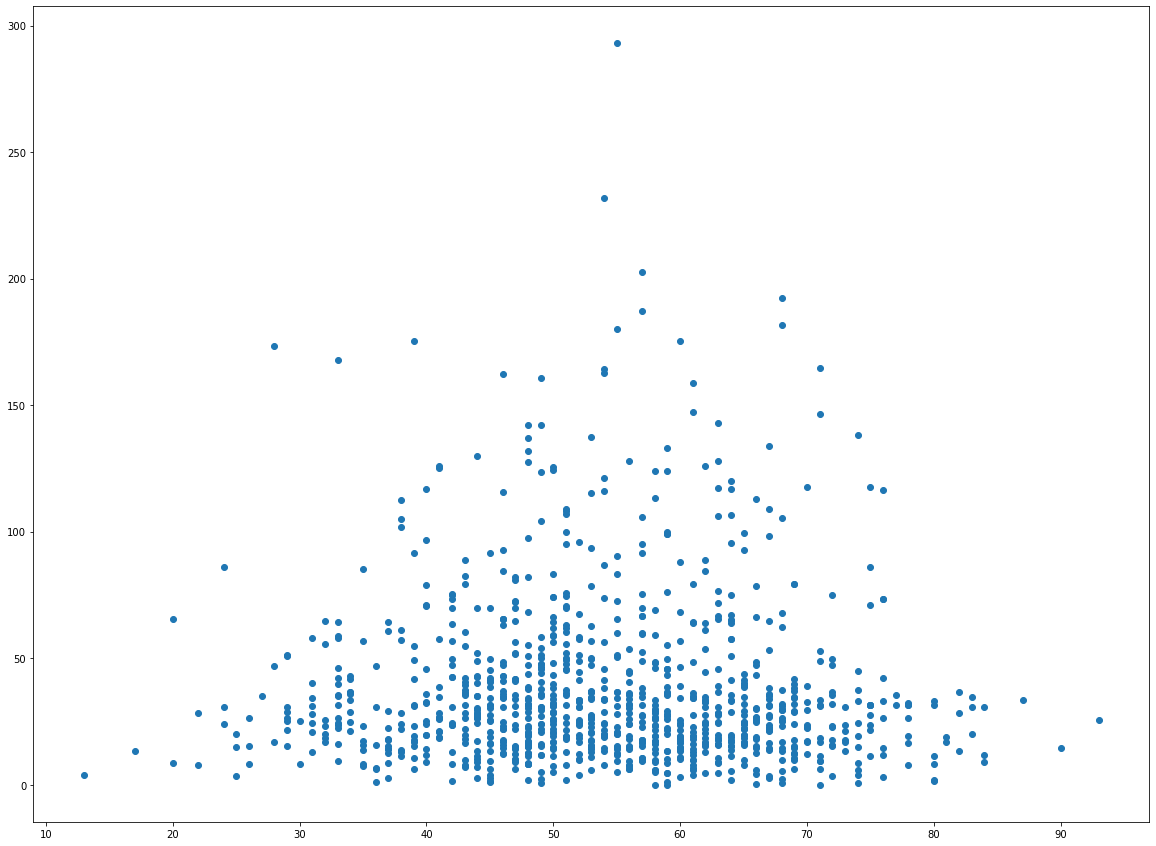

In [31]:
# Split the x and y value to be plotted
xValues = np.array(resultUnchanged['AGE_AT_DIAGNOSIS'])[:, None]
yValues = np.array(resultUnchanged['OS_MONTHS'])
plt.figure(figsize=(20, 15))
plt.scatter(xValues, yValues)

In [32]:
Males = resultUnchanged[resultUnchanged['SEX'] == 'Male']
Females = resultUnchanged[resultUnchanged['SEX'] == 'Female']

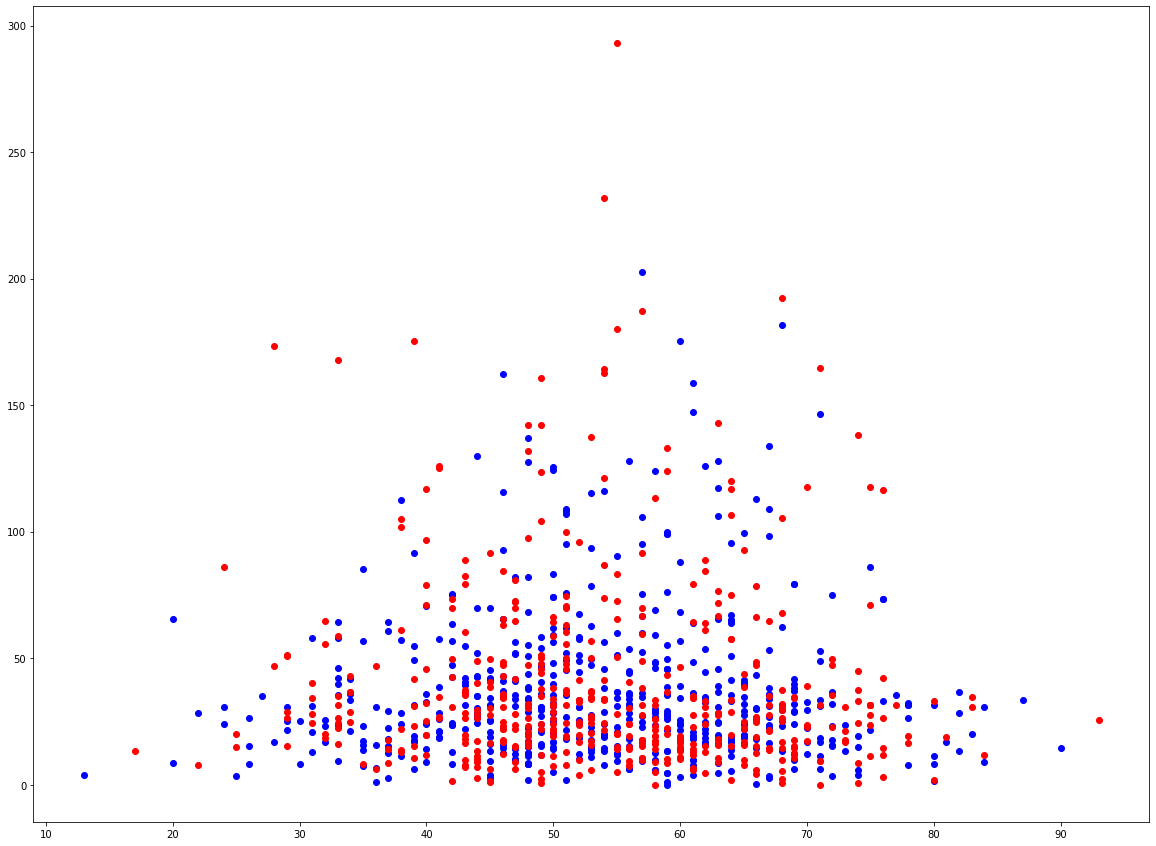

In [33]:
xValuesMales = np.array(Males['AGE_AT_DIAGNOSIS'])[:, None]
yValuesMales = np.array(Males['OS_MONTHS'])

xValuesFemales = np.array(Females['AGE_AT_DIAGNOSIS'])[:, None]
yValuesFemales = np.array(Females['OS_MONTHS'])


plt.figure(figsize=(20, 15))
plt.scatter(xValuesMales, yValuesMales, label = 'Male', color = 'blue')
plt.scatter(xValuesFemales, yValuesFemales, label = 'Female', color = 'red')

#### Advanced Visualization using Plotly

,SEX,MSI_STATUS
0,Female,Unknown
1,Female,MSS
2,Male,Unknown
3,Female,MSS
4,Male,MSS
...,...,...
1129,Male,MSS
1130,Male,Unknown
1131,Female,MSS
1132,Female,MSI


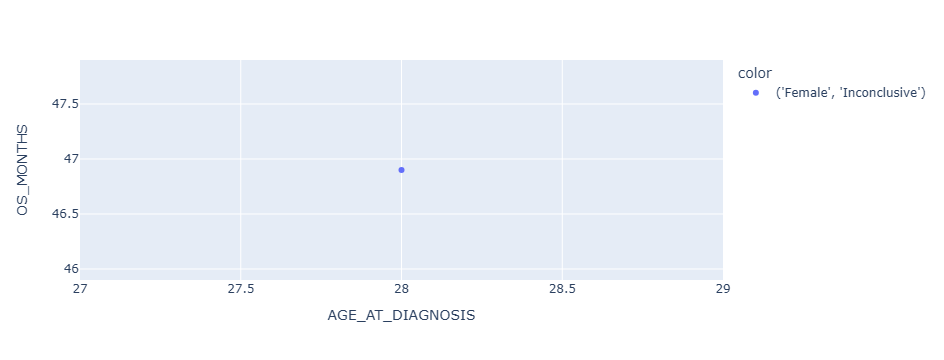

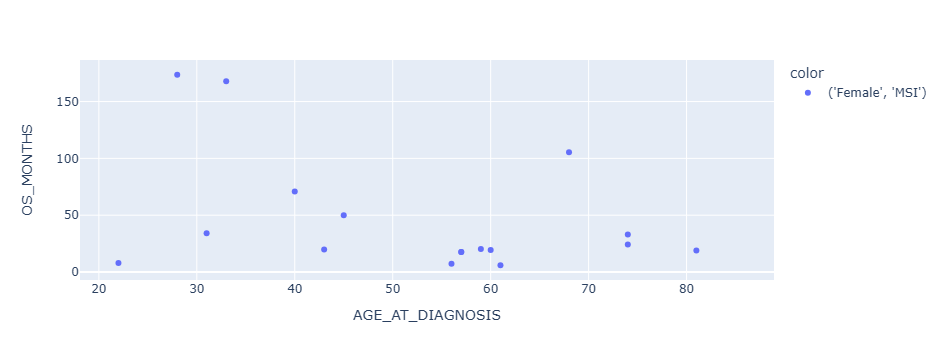

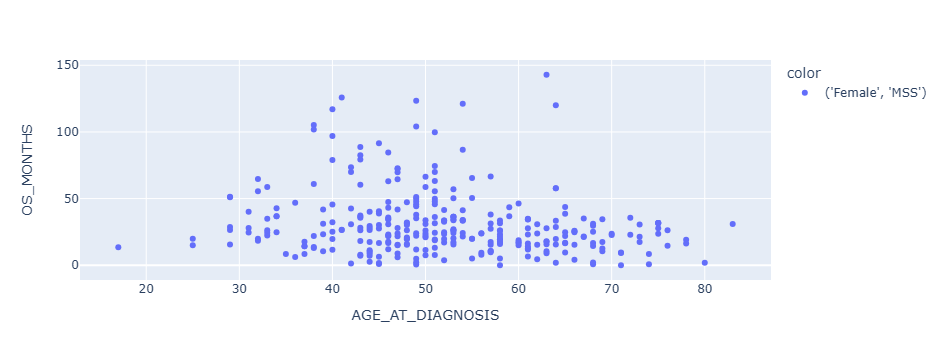

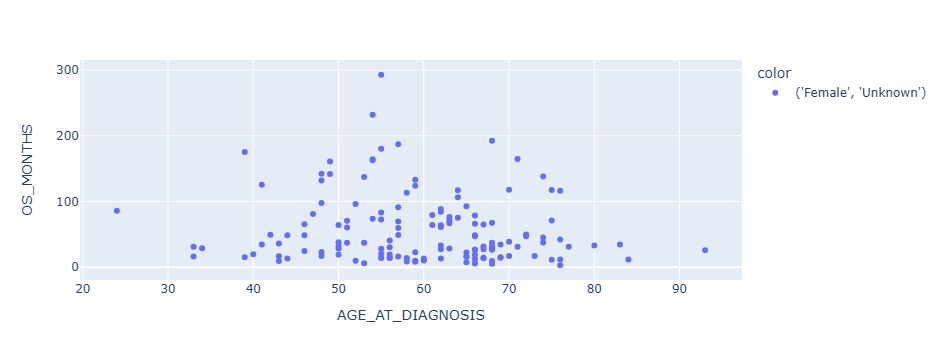

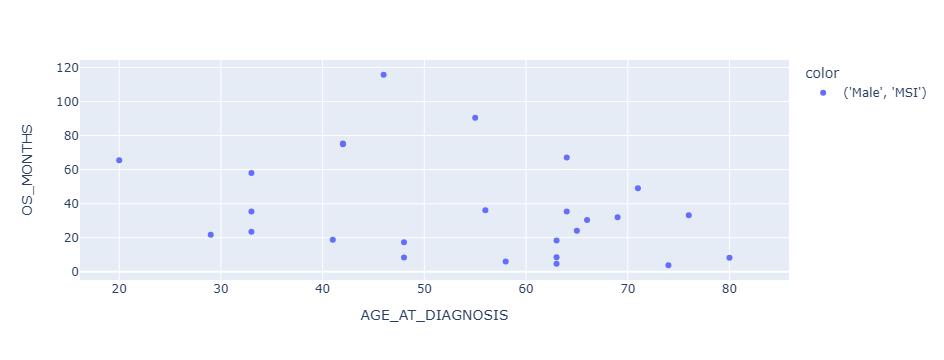

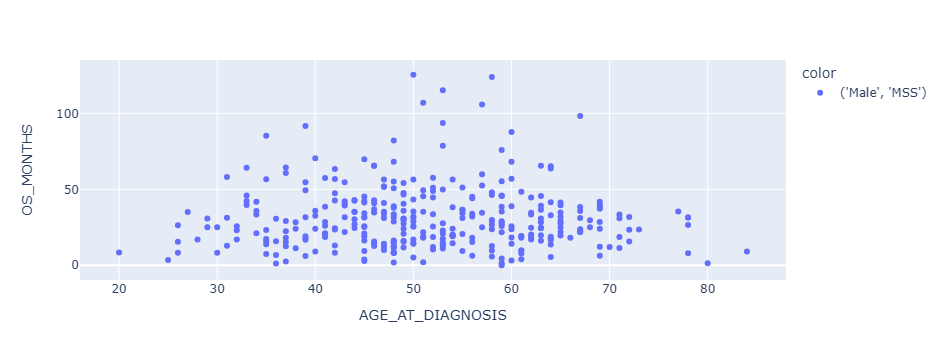

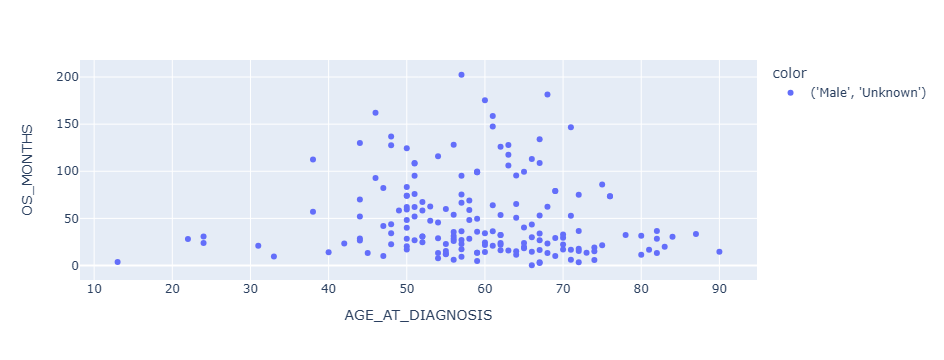

In [28]:
valuesToInsert = ['SEX', "MSI_STATUS"]
group_and_visualize_plots(valuesToInsert)

#### KMeans Clustering Visualization + Analysis

In [37]:
xPandas = resultUnchanged[['AGE_AT_DIAGNOSIS','OS_MONTHS']]
xPandas = xPandas.dropna()
X = xPandas.to_numpy()
#display(X)
#print(X.shape)

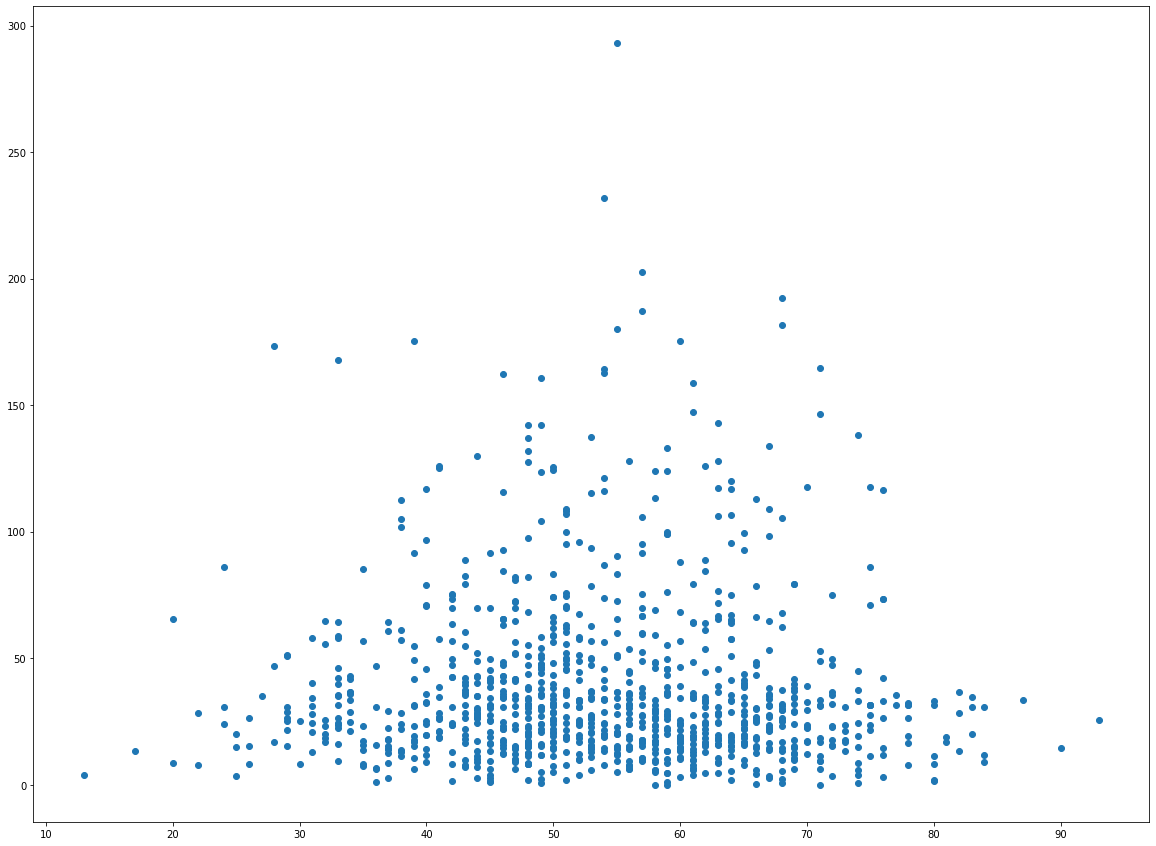

In [38]:
xValues = np.array(resultUnchanged['AGE_AT_DIAGNOSIS'])
yValues = np.array(resultUnchanged['OS_MONTHS'])
plt.figure(figsize=(20, 15))
plt.scatter(xValues, yValues)

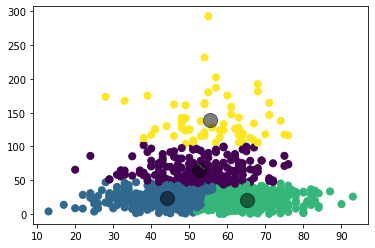

In [42]:
# Function returns a Pandas Dataframe that merges the information from the existing UnchangedData frame and adds the corresponding cluster from the graph 
four_clusters = display_and_visualize_cluster(4)

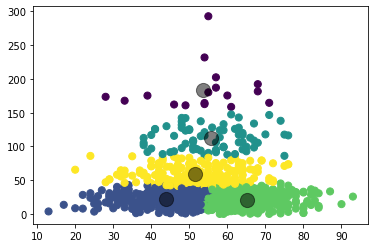

In [41]:
five_clusters = display_and_visualize_cluster(5)

#### Random Forest Visualization and Analysis

## Liver Metastasis Only

In [1]:
# In order to obtain info for all of the patients with Liver Metastasis, run the lines below

In [ ]:
# If these installations have already been made, then this line of code can be skipped
!pip install pandasql
!pip install plotly==5.14.1

In [33]:
# If these imports have already been made above, this line of code may also be skipped
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import pandas as pd
from pandasql import sqldf
import plotly.express as px
from sklearn.cluster import KMeans

In [34]:
def obtainFullPatientInfo():
    clinicalPatientDF = pd.read_csv("../Test-Data/data_clinical_patient.txt",delimiter="\t", header = 4)
    clinicalSampleDF = pd.read_csv("../Test-Data/data_clinical_sample.txt",delimiter="\t", header = 4)
    
    fullPatientInfo = pd.merge(clinicalPatientDF, clinicalSampleDF, how="outer", on=["PATIENT_ID", "PATIENT_ID"])
    
    # The following is necessary to search for the next line, as the .str.contains method will not work when a DF has empty cells
    fullPatientInfo[['MSI_STATUS']] = fullPatientInfo[['MSI_STATUS']].fillna('Unknown')
    fullPatientInfo[['FIRST_SITE_OF_METS']] = fullPatientInfo[['FIRST_SITE_OF_METS']].fillna('Not Provided')
    fullPatientInfo[['METASTATIC_BIOPSY_SITE']] = fullPatientInfo[['METASTATIC_BIOPSY_SITE']].fillna('Not Provided')
    
    return fullPatientInfo

In [35]:
temporaryDF = obtainFullPatientInfo()

liverString = 'Liver'
#liverOnlyFirstSite = temporaryDF.loc[[temporaryDF['FIRST_SITE_OF_METS'].str.contains(liverString)] || [temporaryDF['METASTATIC_BIOPSY_SITE'].str.contains(liverString)]]
liverOnlyFirstSite = temporaryDF.loc[temporaryDF['FIRST_SITE_OF_METS'].str.contains(liverString)]
liverOnlyMBS = temporaryDF.loc[temporaryDF['METASTATIC_BIOPSY_SITE'].str.contains(liverString)]
liverOnly = pd.merge(liverOnlyFirstSite, liverOnlyMBS, how = 'inner')
liverOnly.head()

,PATIENT_ID,AGE_AT_DIAGNOSIS,SEX,VITAL_STATUS,OS_STATUS,OS_MONTHS,OS_MONTHS_ADDITIONAL,PATIENT_GRADE,SAMPLE_ID,CHEMO_EXP_SEQ_SPECIMEN,...,METASTASES_SITE_FIRST_PELVIS,METASTASES_SITE_FIRST_BRAIN,METASTASES_SITE_FIRST_BONE,METASTASES_SITE_FIRST_PERITONEUM_OMENTUM_ABDOMEN,METASTASES_SITE_FIRST_GYN,OTHER_SITES_OF_METS,CANCER_TYPE,CANCER_TYPE_DETAILED,SOMATIC_STATUS,TMB_NONSYNONYMOUS
0,P-0000493,24,Male,Deceased,1:DECEASED,23.87,NaN,NaN,P-0000493-T01-IM3,Yes,...,0,0,0,0,0,1,Colorectal Cancer,Colorectal Adenocarcinoma,Matched,4.436621
1,P-0000552,63,Male,Deceased,1:DECEASED,16.00,NaN,NaN,P-0000552-T01-IM3,Yes,...,0,0,0,0,0,0,Colorectal Cancer,Colorectal Adenocarcinoma,Matched,6.654932
2,P-0000736,66,Female,Living,0:LIVING,48.50,NaN,Mod_Diff,P-0000736-T01-IM3,No,...,0,0,0,0,0,0,Colorectal Cancer,Colorectal Adenocarcinoma,Matched,8.873242
3,P-0000738,49,Male,Living,0:LIVING,54.17,NaN,Mod_Diff,P-0000738-T01-IM3,No,...,0,0,0,0,0,0,Colorectal Cancer,Colorectal Adenocarcinoma,Matched,6.654932
4,P-0000739,76,Male,Living,0:LIVING,73.53,NaN,Mod_Diff,P-0000739-T01-IM3,Yes,...,0,0,0,0,0,0,Colorectal Cancer,Colorectal Adenocarcinoma,Matched,7.764087


In [36]:
# Run this line only to export files that contain only liver metastatis patients
liverOnly.to_csv(r'liverMetastasisOnly.csv', index=False)
liverOnly.to_excel(r'liverMetastasisOnly.xlsx', index=False)

<AxesSubplot:>

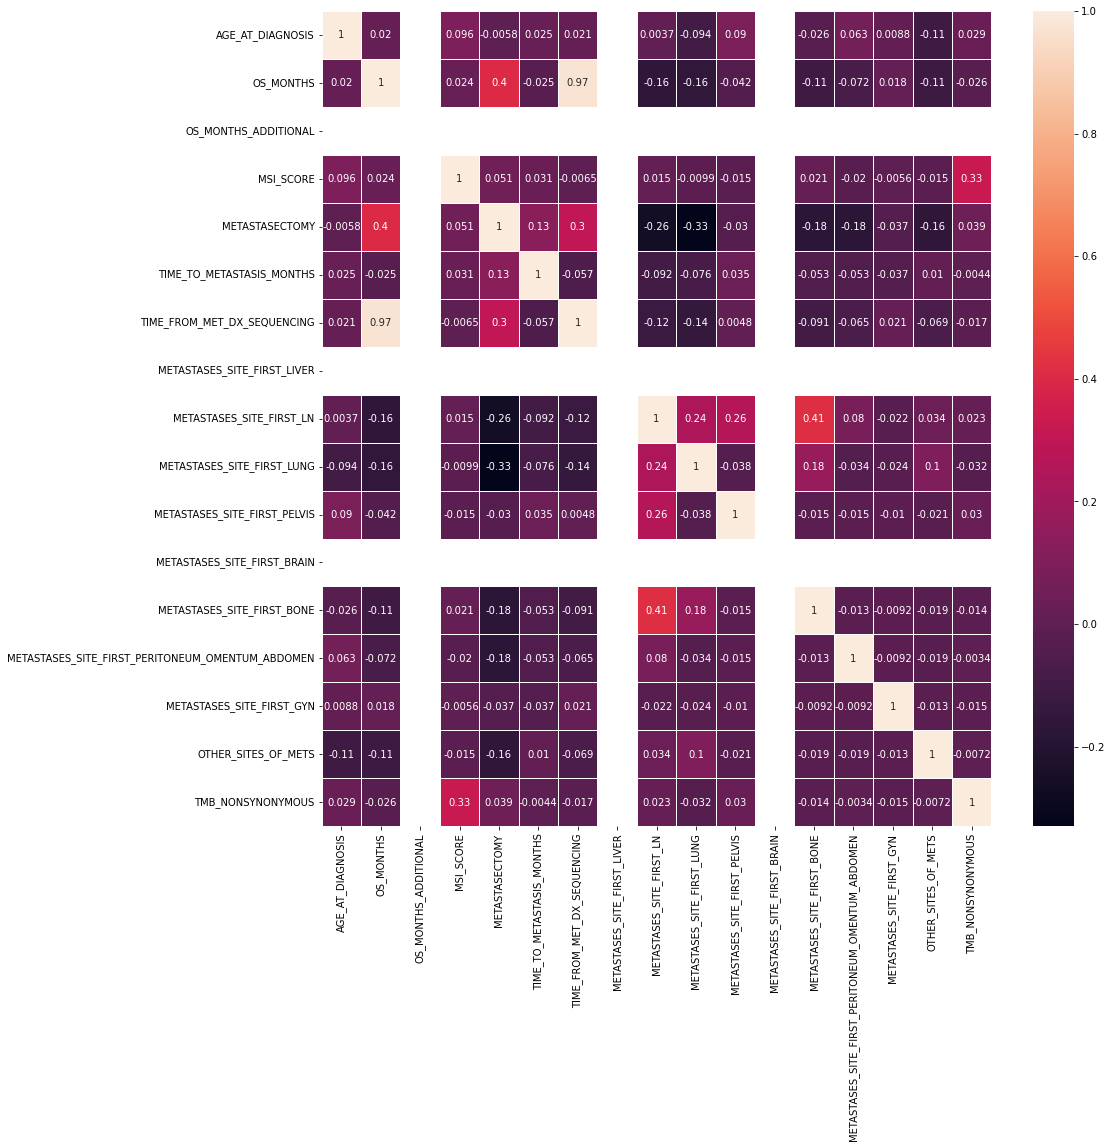

In [60]:
# Visual representation of the correlation between the variables
corr = liverOnly.corr()

fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax)

In [55]:
# The following block of code is used to iterate over the Pandas Dataframe containing the correlations between the variables

for rowIndex, row in corr.iterrows(): 
    #iterates over rows
    for columnIndex, value in row.items():
    # iterates over columns
        # the value of 0.2 was picked arbitrarily, if higher values of correlation are required, then the below line can be adjusted
        if (value > 0.2) and (rowIndex < columnIndex):
            # the below behavior can also be changed from printing to some other purpose
            print(rowIndex, columnIndex)
            print(value)
            print()

OS_MONTHS TIME_FROM_MET_DX_SEQUENCING
0.9721430447713816

MSI_SCORE TMB_NONSYNONYMOUS
0.32534256068336437

METASTASECTOMY OS_MONTHS
0.40193484976687144

METASTASECTOMY TIME_FROM_MET_DX_SEQUENCING
0.30245181498646084

METASTASES_SITE_FIRST_LN METASTASES_SITE_FIRST_LUNG
0.24130941691402347

METASTASES_SITE_FIRST_LN METASTASES_SITE_FIRST_PELVIS
0.26387233370492247

METASTASES_SITE_FIRST_BONE METASTASES_SITE_FIRST_LN
0.41371225797118616

